In [1]:
import numpy as np  
import pandas as pd
from numpy import mean
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
display(df.shape)
df.describe()

(693071, 57)

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Cleaning
Proses data cleaning adalah langkah awal dalam persiapan data dan melibatkan identifikasi, penanganan, dan eliminasi masalah dalam dataset, sehingga data menjadi lebih bersih dan dapat diandalkan. 

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [6]:
# mengubah tipe data datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
# Kolom 'visibility' dan 'visibility.1' ternyata memiliki nilai yang sama (data duplikat), oleh karena itu harus dihapus salah satunya.
df[['visibility','visibility.1']].head(10)

,visibility,visibility.1
0,10.000,10.000
1,4.786,4.786
2,10.000,10.000
3,10.000,10.000
4,10.000,10.000
5,8.325,8.325
6,4.675,4.675
7,3.052,3.052
8,1.413,1.413
9,2.686,2.686


In [8]:
df[['visibility','visibility.1']].duplicated().sum()

692844

In [9]:
df = df.drop(['visibility.1'],axis=1)

In [10]:
# mengecek missing value
df.isna().sum()/len(df)*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Skewness kolom 'price': 1.0457470560899256


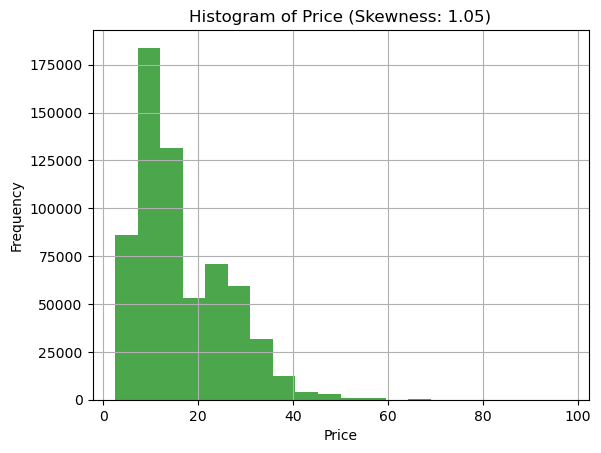

Gunakan median untuk mengisi missing value: 13.5


In [11]:
# Menghitung skewness kolom 'price'
skewness = df['price'].skew()

print(f"Skewness kolom 'price': {skewness}")

# Jika skewness positif (condong ke kanan), gunakan median.
# Jika skewness negatif (condong ke kiri), gunakan mean.
# Jika skewness mendekati 0 (simetris), Anda bisa memilih salah satunya.

# Membuat histogram
plt.hist(df['price'], bins=20, color='green', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'Histogram of Price (Skewness: {skewness:.2f})')
plt.grid(True)
plt.show()

if skewness > 0:
    fill_value = df['price'].median()
    print(f"Gunakan median untuk mengisi missing value: {fill_value}")
elif skewness < 0:
    fill_value = df['price'].mean()
    print(f"Gunakan mean untuk mengisi missing value: {fill_value}")
else:
    # Jika skewness mendekati 0 (simetris), pilih salah satu (mean atau median).
    fill_value = df['price'].median()  # Atau Anda bisa menggunakan mean.
    print(f"Gunakan median (atau mean) untuk mengisi missing value: {fill_value}")

In [12]:
# Menghitung median kolom "price"
median_price = df['price'].median()

# Mengisi missing values dalam kolom "price" dengan median
df['price'].fillna(median_price, inplace=True)

In [13]:
df.isna().sum()/len(df)*100

id                             0.0
timestamp                      0.0
hour                           0.0
day                            0.0
month                          0.0
datetime                       0.0
timezone                       0.0
source                         0.0
destination                    0.0
cab_type                       0.0
product_id                     0.0
name                           0.0
price                          0.0
distance                       0.0
surge_multiplier               0.0
latitude                       0.0
longitude                      0.0
temperature                    0.0
apparentTemperature            0.0
short_summary                  0.0
long_summary                   0.0
precipIntensity                0.0
precipProbability              0.0
humidity                       0.0
windSpeed                      0.0
windGust                       0.0
windGustTime                   0.0
visibility                     0.0
temperatureHigh     

# Visualisasi Data

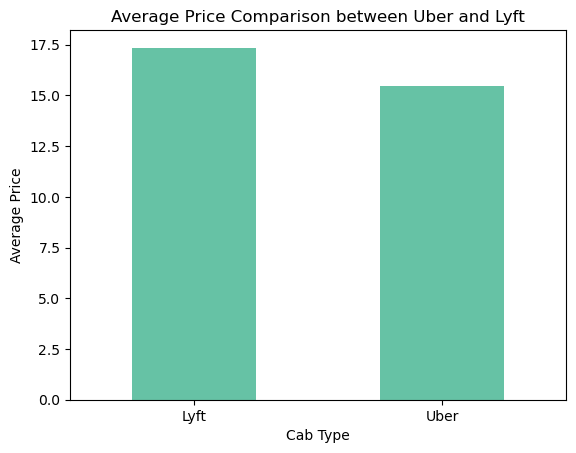

In [14]:
# Mengelompokkan data berdasarkan cab_type dan menghitung rata-rata harga
average_prices = df.groupby('cab_type')['price'].mean()

# Mengatur palet warna menggunakan seaborn
sns.set_palette("Set2")

# Membuat plot bar
average_prices.plot(kind='bar')
plt.xlabel('Cab Type')
plt.ylabel('Average Price')
plt.title('Average Price Comparison between Uber and Lyft')
plt.xticks(rotation=0)
plt.show()

In [15]:
df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.467435
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='name'>

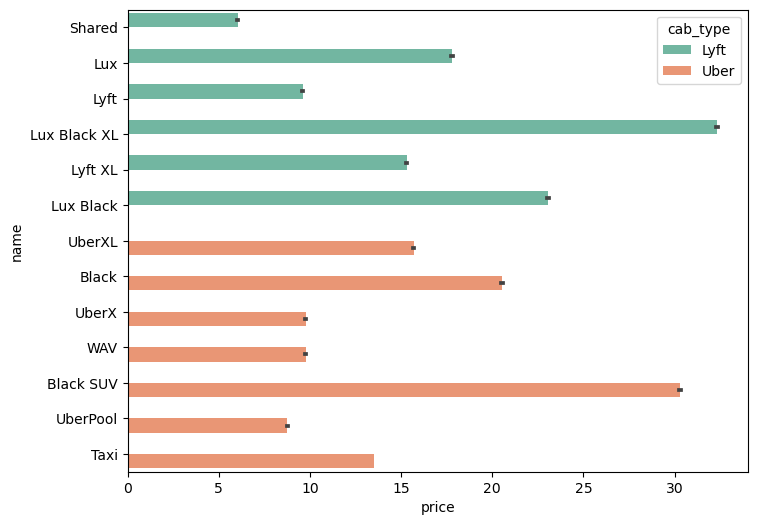

In [16]:
# perbandingan jenis mobil uber dan lyft dalam mempengaruhi tarif
plt.figure(figsize=(8, 6))
sns.barplot(y='name', x='price', data=df, hue='cab_type', palette='Set2')

In [17]:
# Menampilkan nilai mean harga dari setiap jenis mobil
name_price = df.groupby('name')['price'].mean()
name_price

name
Black           20.523786
Black SUV       30.286763
Lux             17.771240
Lux Black       23.062468
Lux Black XL    32.324086
Lyft             9.610885
Lyft XL         15.309363
Shared           6.029893
Taxi            13.500000
UberPool         8.752500
UberX            9.765074
UberXL          15.678144
WAV              9.765019
Name: price, dtype: float64

**Kesimpulan** 

Jenis mobil yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan. Selain itu, diperoleh informasi bahwa:
1. Lyft 
    - Tarif tertinggi adalah saat menggunakan jenis mobil Lux Black XL dengan tarif sebesar 32.32 USD <br>
    - Tarif terendah adalah saat menggunakan jenis mobil Shared dengan tarif sebesar 6.02 USD <br>
2. Uber 
    - Tarif tertinggi adalah saat menggunakan jenis mobil Black SUV dengan tarif sebesar 30.28 USD <br>
    - Tarif terendah adalah saat menggunakan jenis mobil UberPool dengan tarif sebesar 8.75 USD <br>

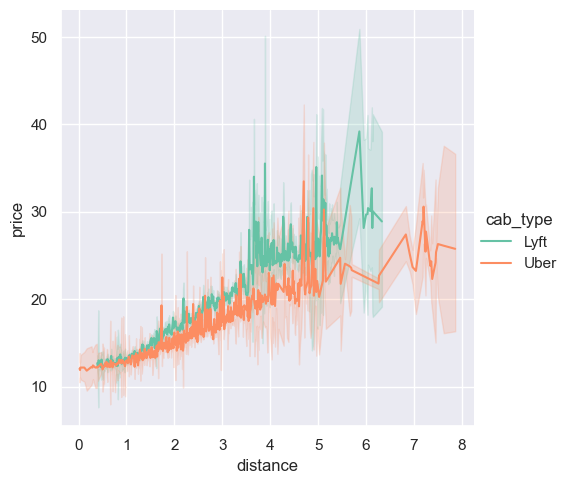

In [18]:
# korelasi antara jarak dengan tarif
sns.set(rc={'figure.figsize':(8,6)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data=df,
            hue='cab_type',
            palette = 'Set2'
           )

**Kesimpulan**

korelasi yang dihasilkan adalah korelasi positif, dimana semakin jauh jarak yang ditempuh maka semakin besar tarifnya. dan dapat kita lihat tarif lyft lebih tinggi dibandingkan dengan uber.

In [19]:
# korelasi jam dengan tarif
hour = df.groupby(['cab_type','hour'])['price'].sum()
df_hour = pd.DataFrame(hour)
df_hour

price
cab_type hour           
Lyft     0     255765.50
         1     219313.50
         2     217391.85
         3     212115.50
         4     217118.50
         5     193347.30
         6     206264.00
         7     190891.00
         8     186212.00
         9     223492.50
         10    230644.00
         11    234014.50
         12    236207.50
         13    234330.70
         14    231032.50
         15    232217.00
         16    231757.85
         17    240697.50
         18    231052.00
         19    216630.93
         20    203715.50
         21    216323.85
         22    231084.00
         23    242338.50
Uber     0     273659.50
         1     245377.00
         2     248602.00
         3     240991.00
         4     245783.50
         5     214101.50
         6     238699.00
         7     214343.00
         8     210819.50
         9     247970.50
         10    263322.50
         11    261642.50
         12    257622.00
         13    261176.00
         14    264475.00
         15    262249.00
         16    262733.50
         17    256743.50
         18    263477.00
         19    232924.00
         20    234144.00
         21    237370.50
         22    250164.50
         23    276827.00

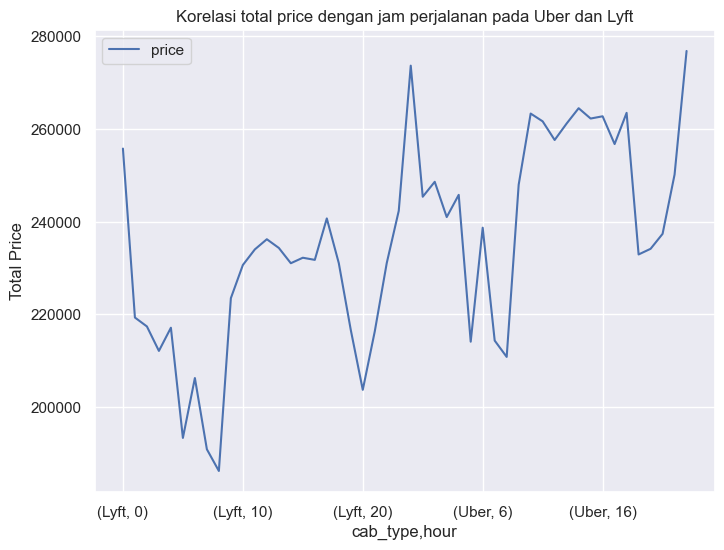

In [20]:
# Visualisasi
df_hour.plot()
plt.rcParams['figure.figsize'] = [10,6] 
sns.set_palette('Set2')
plt.ylabel('Total Price') 
plt.title('Korelasi total price dengan jam perjalanan pada Uber dan Lyft')
plt.show()

**Kesimpulan:** <br>
Terdapat fluktuasi dalam total tarif per jam untuk kedua perusahaan, jam-jam tertentu memiliki total tarif yang lebih tinggi daripada jam-jam lain.
- Berdasarkan visualisasi, diperoleh bahwa:
    1. Lyft <br>
        - Total price paling tinggi berada pada jam 0, yaitu sebesar 255765.50 USD<br>
        - Total price paling rendah berada pada jam 8, yaitu sebesar 186212.00 USD<br>
    2. Uber <br>
        - Total price paling tinggi berada pada jam 0, yaitu sebesar 273659.50 USD<br>
        - Total price paling rendah berada pada jam 8, yaitu sebesar 210819.50 USD<br>

In [21]:
# pengaruh hari terhadap harga dan pengganda tarif

day_price = df.pivot_table(
    index='day', 
    columns='surge_multiplier', 
    values='price', 
    aggfunc=np.mean, 
    fill_value=0)

# # Menghitung rata-rata per hari dan menambahkannya sebagai kolom "mean"
day_price['mean'] = day_price.mean(axis=1, numeric_only=True)

# Mengurutkan berdasarkan rata-rata harga
day_price.sort_values('mean', ascending=False, inplace=True)

# Mereset index
day_price.reset_index(drop=False)
day_price

surge_multiplier,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
day,,,,,,,,
28,15.907271,23.994898,29.648897,33.367698,38.924370,32.342105,41.25,30.776463
14,15.971913,23.445007,28.481050,33.057554,39.933099,35.450000,38.50,30.691232
27,15.980785,23.871151,28.283835,34.846906,38.317623,28.361111,43.70,30.480201
1,15.952450,24.167738,28.281346,34.433544,41.934307,33.100000,34.25,30.302769
17,15.881519,23.801128,28.883544,35.312925,38.478571,28.884615,38.00,29.891758
16,15.982045,24.269851,28.964789,32.140152,36.529586,30.090909,38.00,29.425333
4,16.046230,22.775701,29.631579,37.010638,39.404762,33.666667,0.00,25.505082
13,15.999409,23.720968,28.815254,32.132867,38.412621,38.687500,0.00,25.395517
2,15.966886,22.997024,27.833935,33.329032,41.953125,33.666667,0.00,25.106667


In [22]:
df_top5 = day_price.head()
top5_day = df_top5.drop(['mean'],axis=1)
top5_day

surge_multiplier,1.0,1.25,1.5,1.75,2.0,2.5,3.0
day,,,,,,,
28,15.907271,23.994898,29.648897,33.367698,38.924370,32.342105,41.25
14,15.971913,23.445007,28.481050,33.057554,39.933099,35.450000,38.50
27,15.980785,23.871151,28.283835,34.846906,38.317623,28.361111,43.70
1,15.952450,24.167738,28.281346,34.433544,41.934307,33.100000,34.25
17,15.881519,23.801128,28.883544,35.312925,38.478571,28.884615,38.00


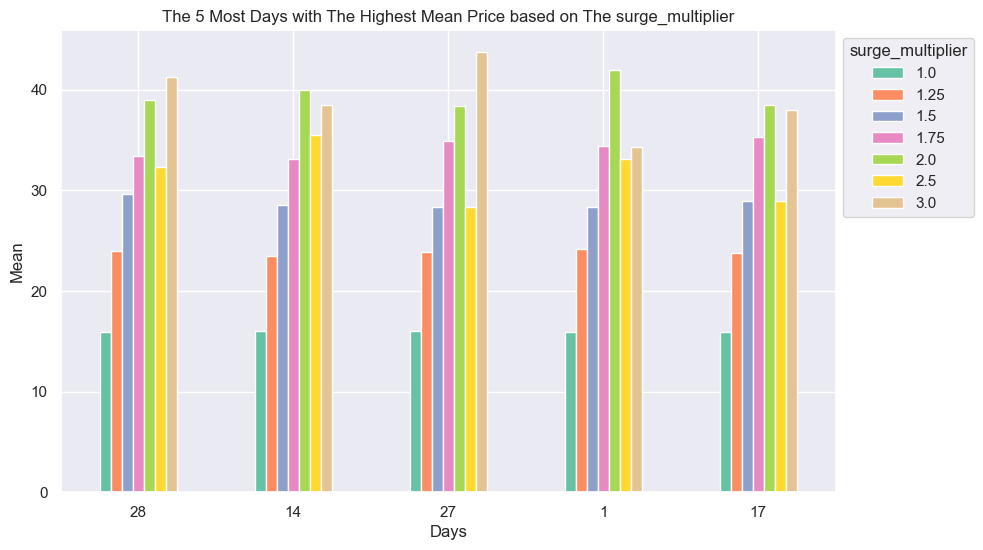

In [23]:
top5_day.plot(kind='bar', figsize=(10,6))

plt.title('The 5 Most Days with The Highest Mean Price based on The surge_multiplier')
plt.legend(bbox_to_anchor=(1,1), title='surge_multiplier')
plt.ylabel('Mean')
plt.xlabel('Days')
plt.xticks(rotation=0) 

plt.show()

In [24]:
df_top5

surge_multiplier,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
day,,,,,,,,
28,15.907271,23.994898,29.648897,33.367698,38.924370,32.342105,41.25,30.776463
14,15.971913,23.445007,28.481050,33.057554,39.933099,35.450000,38.50,30.691232
27,15.980785,23.871151,28.283835,34.846906,38.317623,28.361111,43.70,30.480201
1,15.952450,24.167738,28.281346,34.433544,41.934307,33.100000,34.25,30.302769
17,15.881519,23.801128,28.883544,35.312925,38.478571,28.884615,38.00,29.891758


**Kesimpulan:**
 
Berikut adalah beberapa simpulan yang dapat diambil dari data ini:

- Rata-rata tarif perjalanan (mean) cenderung naik seiring dengan meningkatnya surge multiplier. Artinya, semakin tinggi surge multiplier, semakin mahal rata-rata tarif perjalanan.
- Pada semua hari yang terdaftar, rata-rata tarif perjalanan berada dalam kisaran sekitar 29 hingga 31, dengan variasi tertinggi terjadi pada hari ke-28 (30.78) dan variasi terendah terjadi pada hari ke-17 (29.89).
- Surge multiplier tertinggi (3.0) biasanya menghasilkan rata-rata tarif perjalanan tertinggi, sedangkan surge multiplier terendah (1.0) menghasilkan rata-rata tarif perjalanan terendah.
- Perbedaan dalam surge multiplier antara hari-hari tertentu mungkin disebabkan oleh berbagai faktor, seperti permintaan pelanggan, cuaca, atau waktu puncak lalu lintas.

In [25]:
# Pengaruh cuaca terhadap harga

cuaca = df.pivot_table(values='price',
                       index=['surge_multiplier'],
                       columns=['cab_type', 'short_summary'],
                       aggfunc=np.mean, 
                       fill_value=0)
cuaca.loc['mean'] = cuaca.mean()
cuaca = cuaca.T
cuaca = cuaca.reset_index(drop=False)

cuaca.sort_values('mean', ascending=False, inplace=True)

<Axes: xlabel='mean', ylabel='short_summary'>

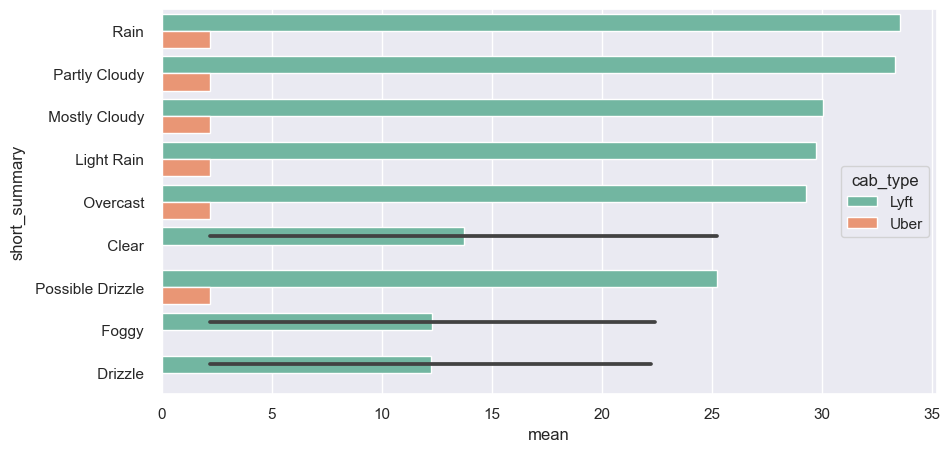

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mean', y='short_summary', hue= df.cab_type, data=cuaca, palette='Set2')

In [27]:
cuaca

surge_multiplier,cab_type,short_summary,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
8,Lyft,Rain,16.581970,23.615183,27.435897,36.976190,39.547619,25.500000,65.000000,33.522409
6,Lyft,Partly Cloudy,16.622169,24.095661,28.335751,33.038540,39.012262,29.666667,62.500000,33.324436
4,Lyft,Mostly Cloudy,16.593640,23.724283,29.009285,33.342241,39.313910,30.583333,37.750000,30.045242
3,Lyft,Light Rain,16.589515,23.796782,28.779948,32.702247,40.134831,33.361111,32.833333,29.742538
5,Lyft,Overcast,16.574693,23.750371,29.377551,34.279861,38.325532,26.912500,35.666667,29.269596
0,Lyft,Clear,16.519477,23.563738,28.963102,33.220085,40.725490,33.750000,0.000000,25.248842
7,Lyft,Possible Drizzle,16.539725,23.008361,26.988372,35.623188,36.697917,37.750000,0.000000,25.229652
2,Lyft,Foggy,16.682484,24.005650,30.913333,33.087500,29.595238,22.500000,0.000000,22.397744
1,Lyft,Drizzle,16.689300,24.076190,28.436170,31.840909,36.684211,18.000000,0.000000,22.246683
13,Uber,Mostly Cloudy,15.508915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.215559


**Kesimpulan:**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:
- Cuaca dapat berpengaruh pada tarif sehingga bisa membuat tarif yang didapatkan lebih mahal
- Dalam kasus Lyft, cuaca nampaknya mempengaruhi tarif. Tarif rata-rata cenderung lebih tinggi ketika cuaca adalah hujan atau berkabut (Rain, Light Rain, Foggy, Drizzle). 
- Rata-rata pesanan dengan harga tertinggi berdasarkan cuaca dan pengganda tarif adalah saat cuaca Rain pada tipe Lyft yang mencapai nilai rata-rata harga 33.5 USD
- Harga pengganda paling tinggi adalah saat cuaca Rain dengan pengganda 3 kali lipat dan harga mencapai 65 USD
- Di sisi lain, pada Uber, terdapat perbedaan tarif yang lebih rendah berdasarkan cuaca dibanding dengan lyft.
- Rata-rata pesanan dengan harga terendah berdasarkan cuaca dan pengganda tarif adalah saat cuaca Foggy pada tipe Uber dengan nilai rata-rata harga 2.2 USD
- Tipe Lyft mendominasi pesanan saat pengganda tarif tinggi, sehingga memiliki nilai mean yang lebih besar dibandingkan dengan tipe Uber

In [28]:
# pengaruh jenis mobil dan tipe taksi terhadap pengganda tarif
surge_price = df.pivot_table(index='surge_multiplier', columns=['name', 'cab_type'], values='price', fill_value=0)
surge_price 

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,,
1.00,20.523786,30.286763,17.113552,22.178923,31.103062,9.281424,14.735208,6.029893,13.5,8.7525,9.765074,15.678144,9.765019
1.25,0.000000,0.000000,21.495038,28.099910,39.255074,11.509698,18.482634,0.000000,0.0,0.0000,0.000000,0.000000,0.000000
1.50,0.000000,0.000000,26.220632,34.308490,47.631787,13.731984,22.579467,0.000000,0.0,0.0000,0.000000,0.000000,0.000000
1.75,0.000000,0.000000,30.480372,40.017562,56.113636,15.655992,26.101240,0.000000,0.0,0.0000,0.000000,0.000000,0.000000
2.00,0.000000,0.000000,34.344075,45.506237,63.613306,17.331658,28.958543,0.000000,0.0,0.0000,0.000000,0.000000,0.000000
2.50,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,37.896104,0.000000,0.0,0.0000,0.000000,0.000000,0.000000
3.00,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,50.916667,0.000000,0.0,0.0000,0.000000,0.000000,0.000000


In [29]:
# Mengubah tipe data pada index menjadi int
surge_price.index = surge_price.index.map(int)

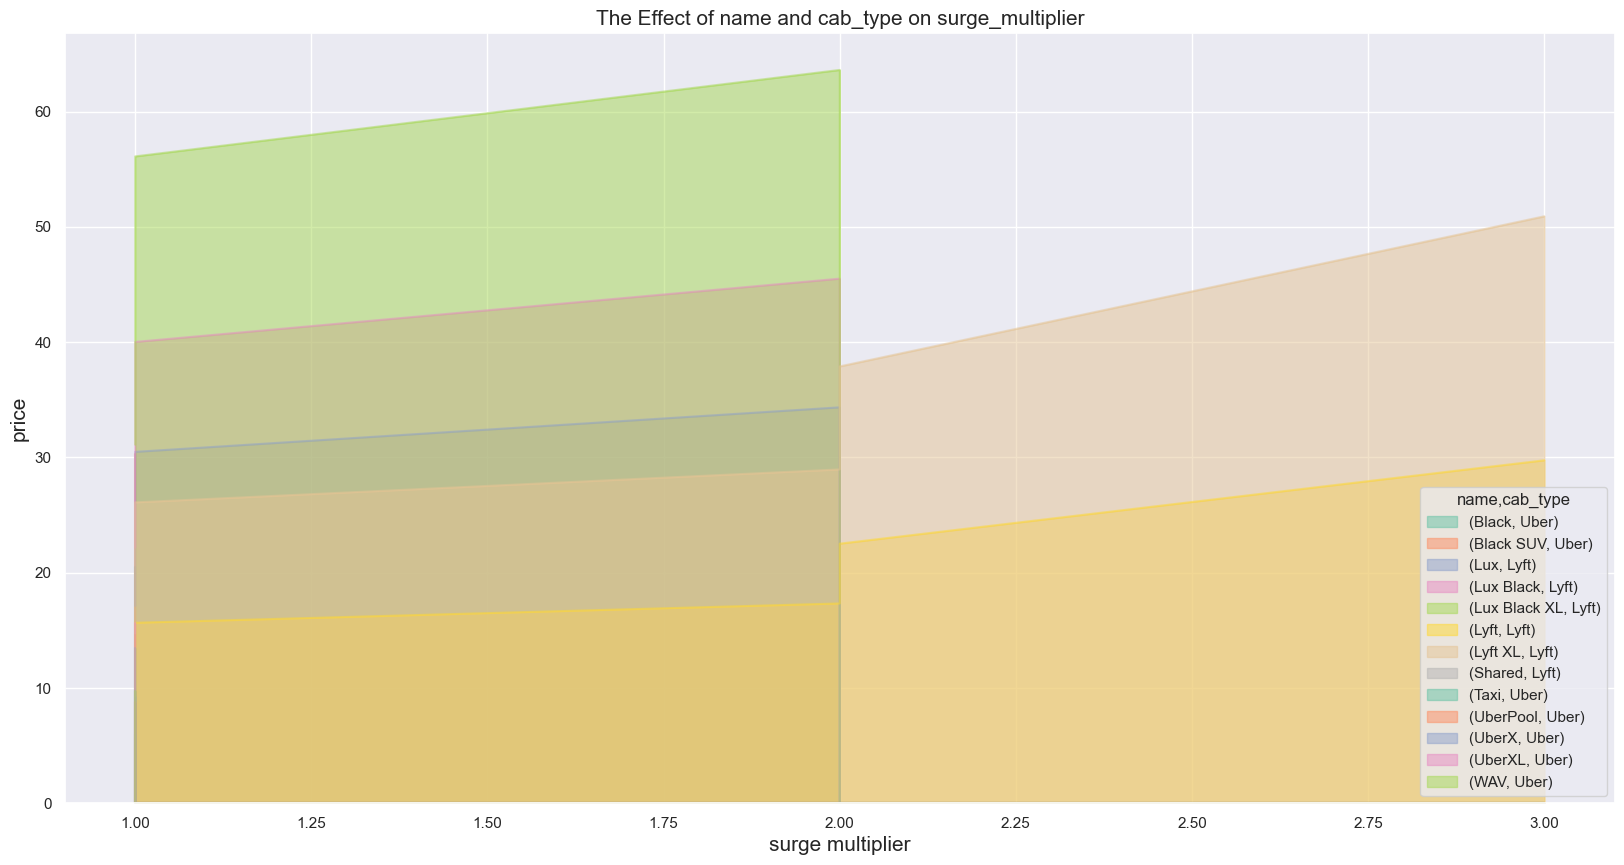

In [30]:
sns.set_palette('Set2')  # Set the color palette
surge_price.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('The Effect of name and cab_type on surge_multiplier', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xlabel('surge multiplier', fontsize=15)

plt.show()

**Kesimpulan :**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:
- Jenis mobil dan tipe taksi yang dipesan berpengaruh kepada pengganda tarif, sehingga harga yang didapatkan bisa lebih mahal
- Tipe uber hanya mengalami pengganda tarif sampai 1.0 saja
- Pengganda tarif terbesar adalah tipe Lyft jenis Lux Black XL dengan harga 63.6 USD pada pengganda ke 2.0
- Tipe taksi yang mencapai pengganda tarif ke 3.0 adalah jenis Lyft XL dengan harga pengganda sebesar 50.9 USD dan jenis Lyft dengan harga pengganda sebesar 29.7 USD

In [31]:
# Source dan distance manakah yang memiliki harga perjalanan termahal dan termurah?
location_price = df.pivot_table(values='price',
                       index=['name'],
                       columns=['source','destination'],
                       aggfunc=np.mean,
                       fill_value=0)
location_price.loc['mean'] = location_price.mean()
location_price = location_price.T
location_price = location_price.reset_index(drop=False)
location_price.sort_values('mean', ascending=False, inplace=True)

<Axes: xlabel='mean', ylabel='source'>

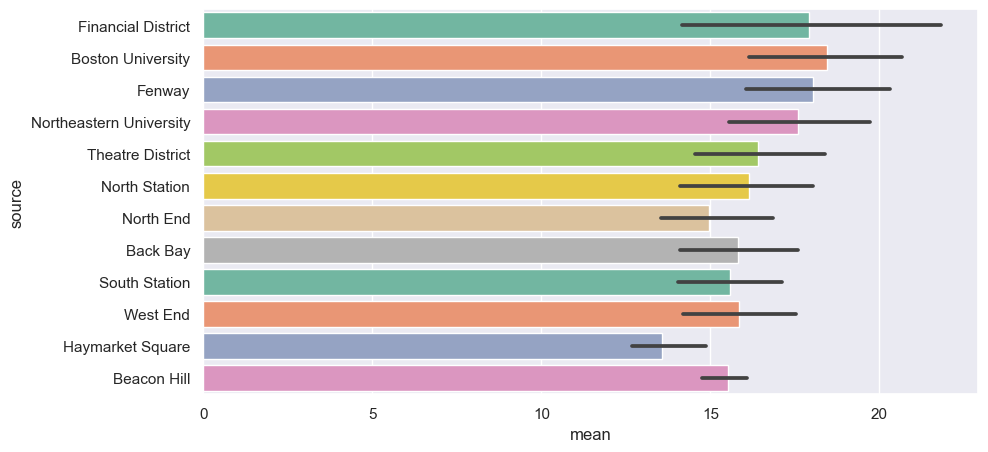

In [32]:
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(x='mean', y='source', data=location_price, palette = 'Set2')

In [33]:
location_price.head(1)

name,source,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV,mean
24,Financial District,Boston University,34.228923,43.572633,28.366481,37.477747,46.765647,14.248957,24.299722,9.324757,13.5,13.40013,14.824903,25.151751,14.824903,24.61435


In [34]:
location_price.tail(1)

name,source,destination,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV,mean
33,Haymarket Square,North Station,15.613158,26.877632,10.797636,16.604312,26.926287,7.018081,9.166898,4.06815,13.5,6.789474,7.171711,9.817105,7.171711,12.424781


**Kesimpulan:**

1. Perjalanan termahal rata-rata adalah dari Financial District ke Boston University, dengan biaya sekitar 24.61 USD. Harga tertinggi terjadi saat menggunakan layanan mobil jenis Lux Black XL dari Lyft, dengan biaya mencapai 46.77 USD. Sementara itu, harga terendah ditemukan saat menggunakan layanan mobil jenis Shared dari Lyft, dengan biaya sekitar 9.32 USD.
2. Perjalanan termurah rata-rata adalah dari Haymarket Square ke North Station, dengan biaya sekitar 12.42 USD. Harga tertinggi terjadi saat menggunakan layanan mobil jenis Lux Black XL dari Lyft, dengan biaya mencapai 26.92 USD. Sedangkan harga terendah ditemukan saat menggunakan layanan mobil jenis Shared dari Lyft, dengan biaya sekitar 4.07 USD.

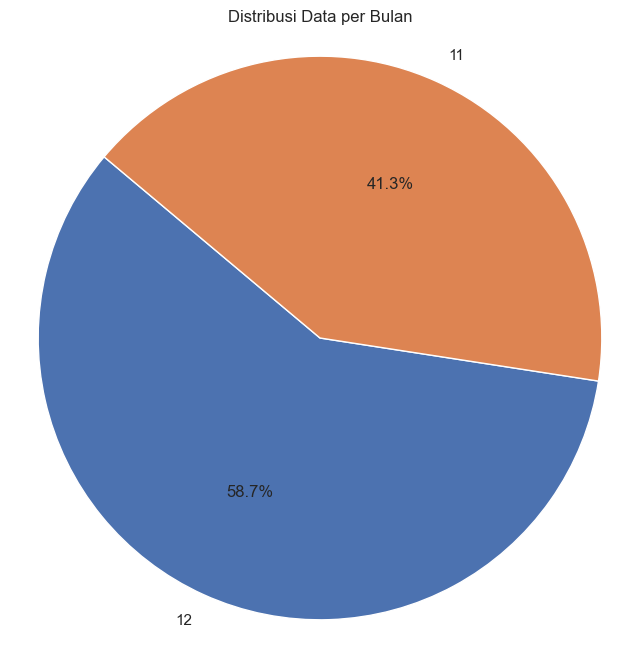

In [35]:
# Menghitung jumlah data untuk setiap bulan
month_counts = df['month'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Data per Bulan')
plt.axis('equal')  # Untuk membuat lingkaran terlihat sebagai lingkaran, bukan elips

# Menampilkan pie chart
plt.show()

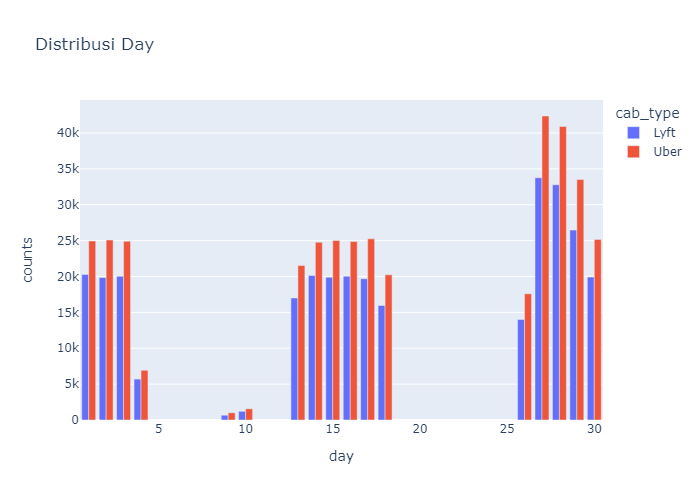

In [36]:
# Plot distribusi 'day'
daily =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=daily, x="day", y="counts", color="cab_type", barmode="group", title="Distribusi Day")
fig2.show(renderer='png')

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

In [38]:
#Mengambil beberapa kolom sample dari df_cleaning1 untuk uji korelasi
df_cor = df.loc[:,['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude','temperature','short_summary','humidity','visibility','price']]
df_cor.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,humidity,visibility,price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,0.68,10.000,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain,0.94,4.786,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear,0.75,10.000,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear,0.73,10.000,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,0.70,10.000,9.0


In [39]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

In [40]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

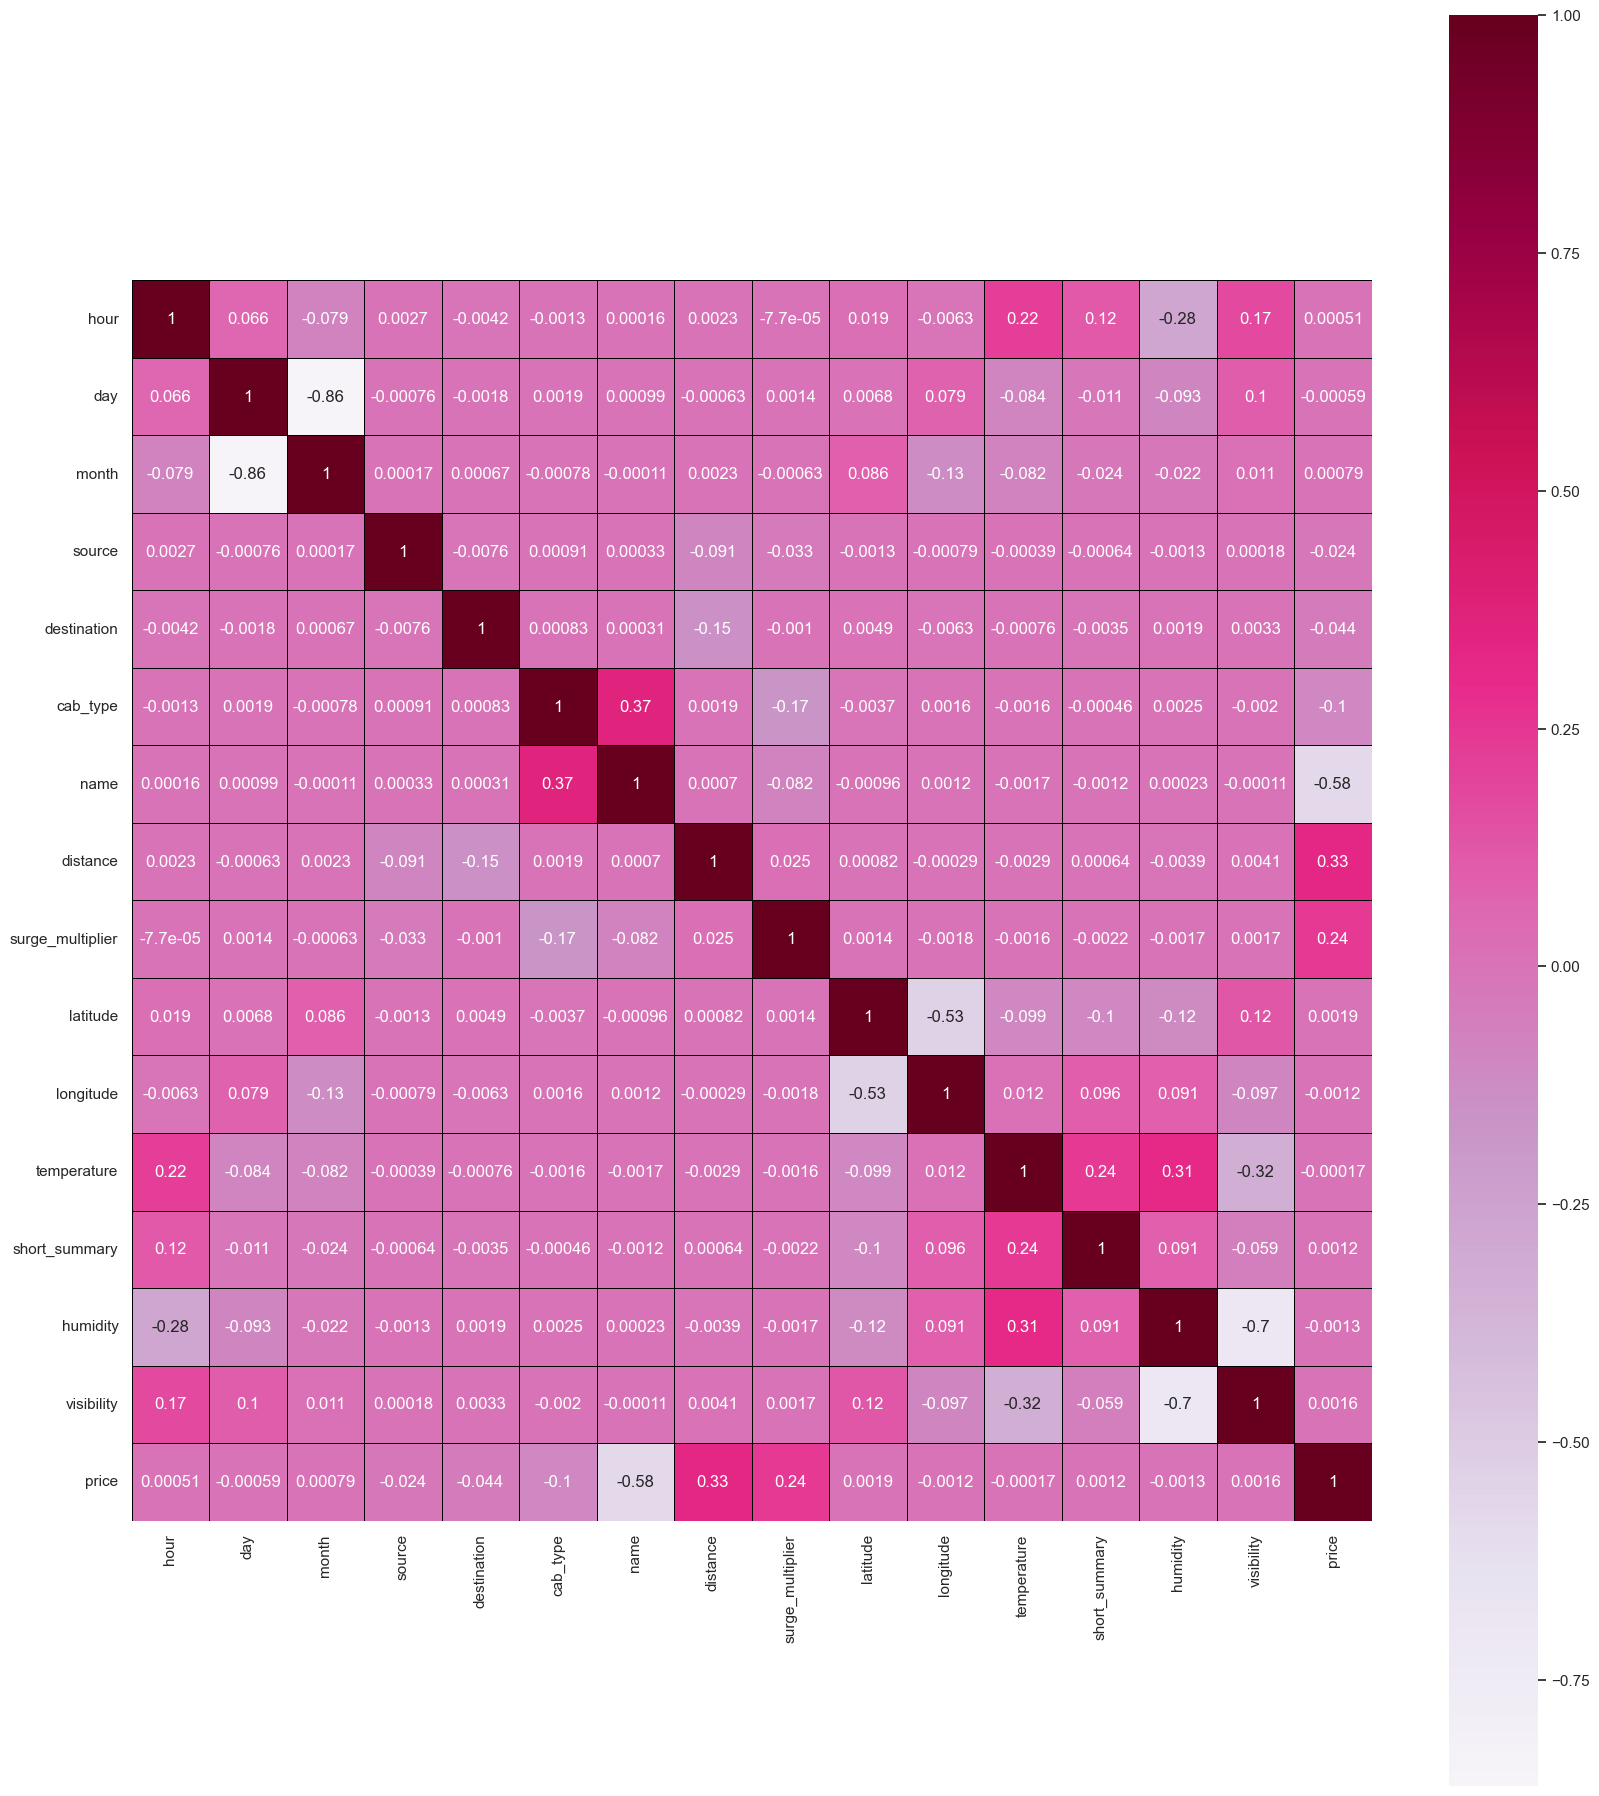

In [41]:
heat_map_model = ['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude','temperature','short_summary','humidity','visibility','price']
heat_map(df_encode_cor,heat_map_model)

**kesimpulan**

Berdasarkan heatmap, dipilih beberapa kolom yang memiliki korelasi cukup tinggi yang kemudian nantinya digunakan untuk variabel X dan Y pada modelling

# Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [42]:
df_central = df.loc[:,['hour','day','month','distance','surge_multiplier','price']]
df_central.head()

,hour,day,month,distance,surge_multiplier,price
0,9,16,12,0.44,1.0,5.0
1,2,27,11,0.44,1.0,11.0
2,1,28,11,0.44,1.0,7.0
3,4,30,11,0.44,1.0,26.0
4,3,29,11,0.44,1.0,9.0


In [43]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: hour
Mean: 11.619
Median: 12.000
Modus: 0.000
Range: 23.000
Variansi: 48.276
Standard Deviasi: 6.948
  
Nama Kolom: day
Mean: 17.794
Median: 17.000
Modus: 27.000
Range: 29.000
Variansi: 99.646
Standard Deviasi: 9.982
  
Nama Kolom: month
Mean: 11.587
Median: 12.000
Modus: 12.000
Range: 1.000
Variansi: 0.242
Standard Deviasi: 0.492
  
Nama Kolom: distance
Mean: 2.189
Median: 2.160
Modus: 2.660
Range: 7.840
Variansi: 1.297
Standard Deviasi: 1.139
  
Nama Kolom: surge_multiplier
Mean: 1.014
Median: 1.000
Modus: 1.000
Range: 2.000
Variansi: 0.008
Standard Deviasi: 0.092
  
Nama Kolom: price
Mean: 16.303
Median: 13.500
Modus: 13.500
Range: 95.000
Variansi: 80.711
Standard Deviasi: 8.984
  


# Cardinality

In [44]:
df_card = df_cor.loc[:,["hour","day",'distance','short_summary','cab_type','name','surge_multiplier','price']]
df_card.head()

,hour,day,distance,short_summary,cab_type,name,surge_multiplier,price
0,9,16,0.44,Mostly Cloudy,Lyft,Shared,1.0,5.0
1,2,27,0.44,Rain,Lyft,Lux,1.0,11.0
2,1,28,0.44,Clear,Lyft,Lyft,1.0,7.0
3,4,30,0.44,Clear,Lyft,Lux Black XL,1.0,26.0
4,3,29,0.44,Partly Cloudy,Lyft,Lyft XL,1.0,9.0


In [45]:
print('Number of categories in the variable Hour             : {}'.format(len(df_card.hour.unique())))
print('Number of categories in the variable Day              : {}'.format(len(df_card.day.unique())))
print('Number of categories in the variable distance         : {}'.format(len(df_card.distance.unique())))
print('Number of categories in the variable short_summary    : {}'.format(len(df_card.short_summary.unique())))
print('Number of categories in the variable cab_type         : {}'.format(len(df_card.cab_type.unique())))
print('Number of categories in the variable name             : {}'.format(len(df_card.name.unique())))
print('Number of categories in the variable surge_multiplier : {}'.format(len(df_card.surge_multiplier.unique())))
print('Number of categories in the variable price            : {}'.format(len(df_card.price.unique())))

Number of categories in the variable Hour             : 24
Number of categories in the variable Day              : 17
Number of categories in the variable distance         : 549
Number of categories in the variable short_summary    : 9
Number of categories in the variable cab_type         : 2
Number of categories in the variable name             : 13
Number of categories in the variable surge_multiplier : 7
Number of categories in the variable price            : 147


**Keterangan**

Kardinalitas jarak dan harga sangat tinggi. namun kita tidak bisa mengurangi kardinalitasnya dikarnakan distance merupakan jarak tempuh perjalanan dan price merupakah harga maka tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality.

# Modeling

In [46]:
scaler = StandardScaler()
df_scaler = df_encode_cor.drop(['price'],axis=1)

In [47]:
X = scaler.fit_transform(df_scaler)
y = df_encode_cor['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((485149, 15), (207922, 15), (485149,), (207922,))

In [48]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['price']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [49]:
df_new = df.loc[:,["hour","day",'distance','short_summary','cab_type','name','surge_multiplier','price']]
df_new.head()

,hour,day,distance,short_summary,cab_type,name,surge_multiplier,price
0,9,16,0.44,Mostly Cloudy,Lyft,Shared,1.0,5.0
1,2,27,0.44,Rain,Lyft,Lux,1.0,11.0
2,1,28,0.44,Clear,Lyft,Lyft,1.0,7.0
3,4,30,0.44,Clear,Lyft,Lux Black XL,1.0,26.0
4,3,29,0.44,Partly Cloudy,Lyft,Lyft XL,1.0,9.0


In [50]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi2, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi2[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi2[variable])
    plt.title('Boxplot')

    plt.show()

In [51]:
select = df_new[['price']]
select.head()

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0


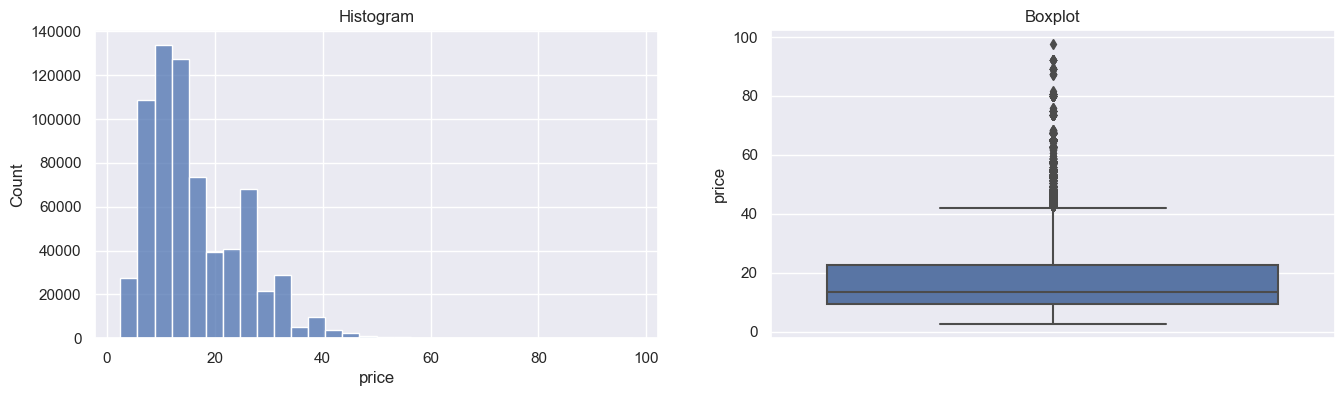

Skewness Value :  1.1540090510529515


In [52]:
diagnostic_plots(select, 'price')
print('Skewness Value : ', select['price'].skew())

Data diatas memiliki skewness value sebesar 1.15. dan juga memiliki banyak outliers

In [53]:
df_encode_new = df_encode_cor.loc[:,["hour","day",'distance','short_summary','cab_type','name','surge_multiplier','price']]
df_encode_new.head()

,hour,day,distance,short_summary,cab_type,name,surge_multiplier,price
0,9,16,0.44,4,0,7,1.0,5.0
1,2,27,0.44,8,0,2,1.0,11.0
2,1,28,0.44,0,0,5,1.0,7.0
3,4,30,0.44,0,0,4,1.0,26.0
4,3,29,0.44,6,0,6,1.0,9.0


In [54]:
outliers(df_encode_new[continous_features])

Pada kolom price, jumlah outliernya adalah 7982


In [55]:
# Menghitung kuartil 1 (Q1) dari kolom 'price' dalam df_encode_new dan menyimpannya dalam variabel Q1
Q1 = df_encode_new['price'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'price' dalam df_encode_new dan menyimpannya dalam variabel Q3
Q3 = df_encode_new['price'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam df_encode_new dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  9.5
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.0


<Axes: >

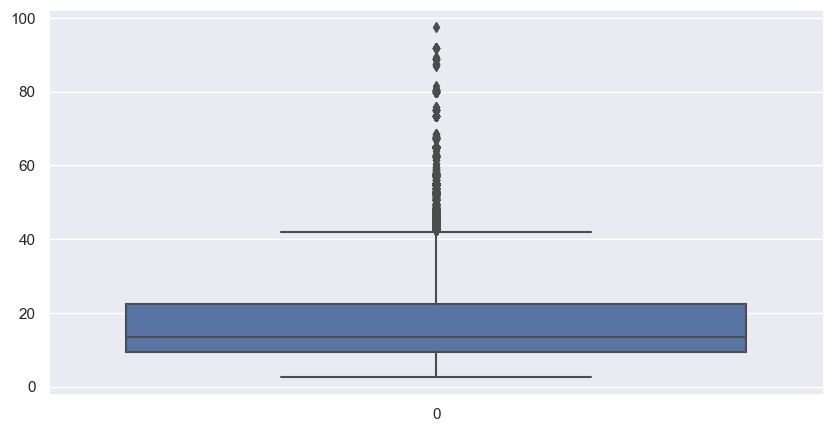

In [56]:
sns.boxplot(df_encode_new["price"])

In [57]:
df_encode_new[df_encode_new['price'] > (Q3 + (1.5 * IQR))].head()

,hour,day,distance,short_summary,cab_type,name,surge_multiplier,price
469,1,1,2.93,5,0,4,1.25,42.5
639,5,30,3.80,0,0,4,1.00,42.5
705,13,26,3.25,5,0,6,2.50,42.5
706,10,28,3.25,6,0,3,2.00,52.5
707,2,16,3.25,6,0,4,2.00,67.5


In [58]:
df_encode_new[df_encode_new['price'] < (Q1 - (1.5 * IQR))]

,hour,day,distance,short_summary,cab_type,name,surge_multiplier,price


In [59]:
print('Data sebelum di hilangkan outliernya :', df_new.shape)
df_encode_new = df_encode_new[~((df_encode_new['price']>(Q3+(1.5*IQR))))]
print('Data sesudah dihilangkan outliernya :', df_encode_new.shape)

Data sebelum di hilangkan outliernya : (693071, 8)
Data sesudah dihilangkan outliernya : (685089, 8)


<Axes: >

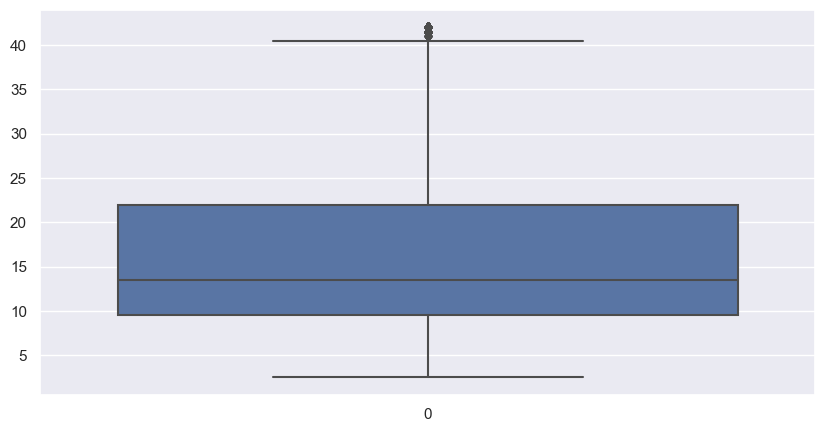

In [60]:
sns.boxplot(df_encode_new["price"])

In [61]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [62]:
# Melakukan copy dataframe df_kondisi menjadi df_onehot
df_onehot = df_new.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot = one_hot_encoder(df_onehot, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot
df_onehot.head()

,hour,day,distance,surge_multiplier,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,0.44,1.0,5.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,27,0.44,1.0,11.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,28,0.44,1.0,7.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,30,0.44,1.0,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3,29,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
model = LinearRegression()

In [64]:
x = df_onehot.drop(columns=['price'],axis=1).values
y = df_onehot['price'].values

# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [65]:
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
print("Nilai R-squared :", r2_score(y_test, y_pred)*100)
print("Nilai MSE :", mse)  
print("Nilai RMSE :", rmse)  

Nilai R-squared : 91.85618176919968
Nilai MSE : 6.588337416401257
Nilai RMSE : 2.5667756848624808


In [67]:
coef2 = model.coef_
intercept = model.intercept_
print("Nilai intercept :", model.intercept_)
print("Nilai slope :", model.coef_)

Nilai intercept : -136626254617.2774
Nilai slope : [ 4.36253595e-04 -3.90632465e-04  2.55528486e+00  1.82835803e+01
  9.10847543e+10  9.10847543e+10  9.10847543e+10  9.10847543e+10
  9.10847543e+10  9.10847543e+10  9.10847543e+10  9.10847543e+10
  9.10847543e+10 -2.10729675e+11  2.58398164e+11 -2.12856664e+11
 -2.12856664e+11  2.56271175e+11  2.56271175e+11  2.56271175e+11
  2.56271175e+11  2.56271175e+11  2.56271175e+11 -2.12856664e+11
 -2.12856664e+11 -2.12856664e+11 -2.12856664e+11 -2.12856664e+11]


In [68]:
y_pred

array([ 6.88104248, 36.74650574, 12.83079529, ...,  4.37237549,
       31.39564514,  2.58230591])

In [69]:
predik = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
predik.head(15)

,Actual,Predicted
0,11.0,6.881042
1,38.5,36.746506
2,10.5,12.830795
3,42.5,41.339859
4,8.5,10.040878
5,31.5,29.638519
6,13.0,17.347626
7,9.0,9.206726
8,13.5,13.118652
9,16.5,14.874115


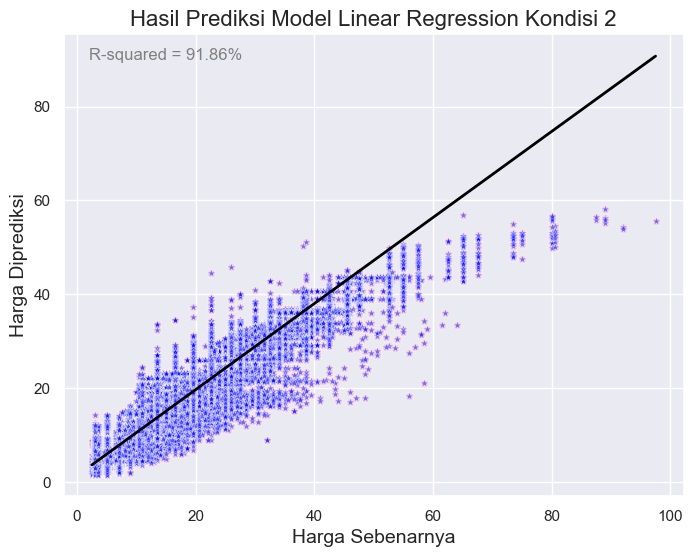

In [70]:
predicted = (y_test < 50) # kondisi untuk subset pertama
subset1_x = y_test
subset1_y = y_pred

subset2_x = y_test
subset2_y = y_pred

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x, y=subset1_y, color='pink', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x, y=subset2_y, color='blue', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test, y=y_pred, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression Kondisi 2', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 90, f'R-squared = {round(r2_score(y_test, y_pred)*100, 2)}%', fontsize=12, color='grey')

plt.show()